#  matplotlib 快速入门

[matpotlib官网](https://matplotlib.org/)

## 1, 以一个例子开始

matpotlib 绘图非常灵活, 方法和参数繁多, 同样的效果, 可以有很多实现方法, 因此常常让人很混乱和困惑, 理解了绘图的层级结构, 使用起来更得心应手:

![](/images/mpt.jpg)

下面将其分四个层级来作说明: 画布 Figure, 绘图对象 Axes, 坐标和图像, 以及图像调整和辅助描述

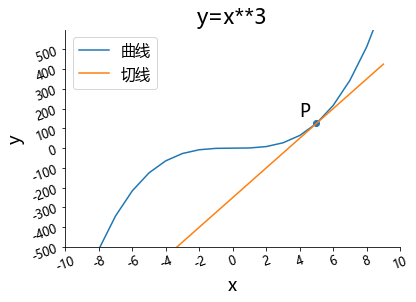

In [2]:
# 导入库  
import matplotlib.pyplot as plt  

'''  
设置 rc 参数: 可以用来修改图形的各种默认属性  
包括窗体大小, 线条宽度, 颜色, 符号, 字体等等  
'''  
plt.rcParams['font.family'] = 'Microsoft YaHei' # 字体  
plt.rcParams['font.size'] = 18 # 全体字体大小  
plt.rcParams['legend.fontsize'] = 12 # 图例标签字体大小  
plt.rcParams['axes.unicode_minus'] = False # 正常显示符号  

# 创建画布对象 Figure, 可以设置大小等  
fig = plt.figure()  

# 用 add_subplot()在画布上面创建绘图对象 Axes, 默认创建一个  
# 也可以用 subplots() 直接将 Figure 和 Axes 一起创建  
ax = fig.add_subplot()  

# 在绘图对象 ax 上绘图, 并设置标签  
x = range(-9, 10)  
y = [n**3 for n in x]  
ax.plot(x, y, label='曲线')  

# 绘制点 P(5, 125)  
ax.scatter(5, 125)  

# 绘制曲线过 P 点的切线  
y1 = [3*(5**2)*(m - 5) + 125 for m in x]  
ax.plot(x, y1, label='切线')  

# 一次性设置 ax 的多个属性  
ax.set(title='y=x**3', # ax 标题  
       xlabel='x', # x轴标题  
       ylabel='y', # y轴标题  
       xlim=(-10,10), # x轴范围  
       ylim=(-500, 600), # y轴范围  
       xticks=range(-10, 11, 2), # x轴刻度和标签  
       yticks=range(-500, 600, 100) # y轴刻度和标签         
      )   
# 上述属性设置方法, 都可以改为如下方法:   
# ax.set_title() 或 plt.title()  

# 注释标注 P 点, (4, 160) 为 P 的坐标  
ax.text(4, 160, 'P')  

# 设置轴标签字体和倾斜度  
ax.tick_params(labelsize=12, labelrotation=20)  

# 去除非 x, y 轴的包围线  
ax.spines['right'].set_color('none')  
ax.spines['top'].set_color('none')  

# 显示每个图的标签  
plt.legend(fontsize=15)  

# 显示  
plt.show()  

通过上例, 能够对 matplotlib 绘图有初步了解:

先有一个画布”桌子”, 然后在上面放”画纸”, 有了”画纸”, 就可以开始画图, 然后按照需求去选”笔”, 布局, 着色, 顺便”作诗落款”注释一下

## 2, 绘制多个绘图对象 Axes

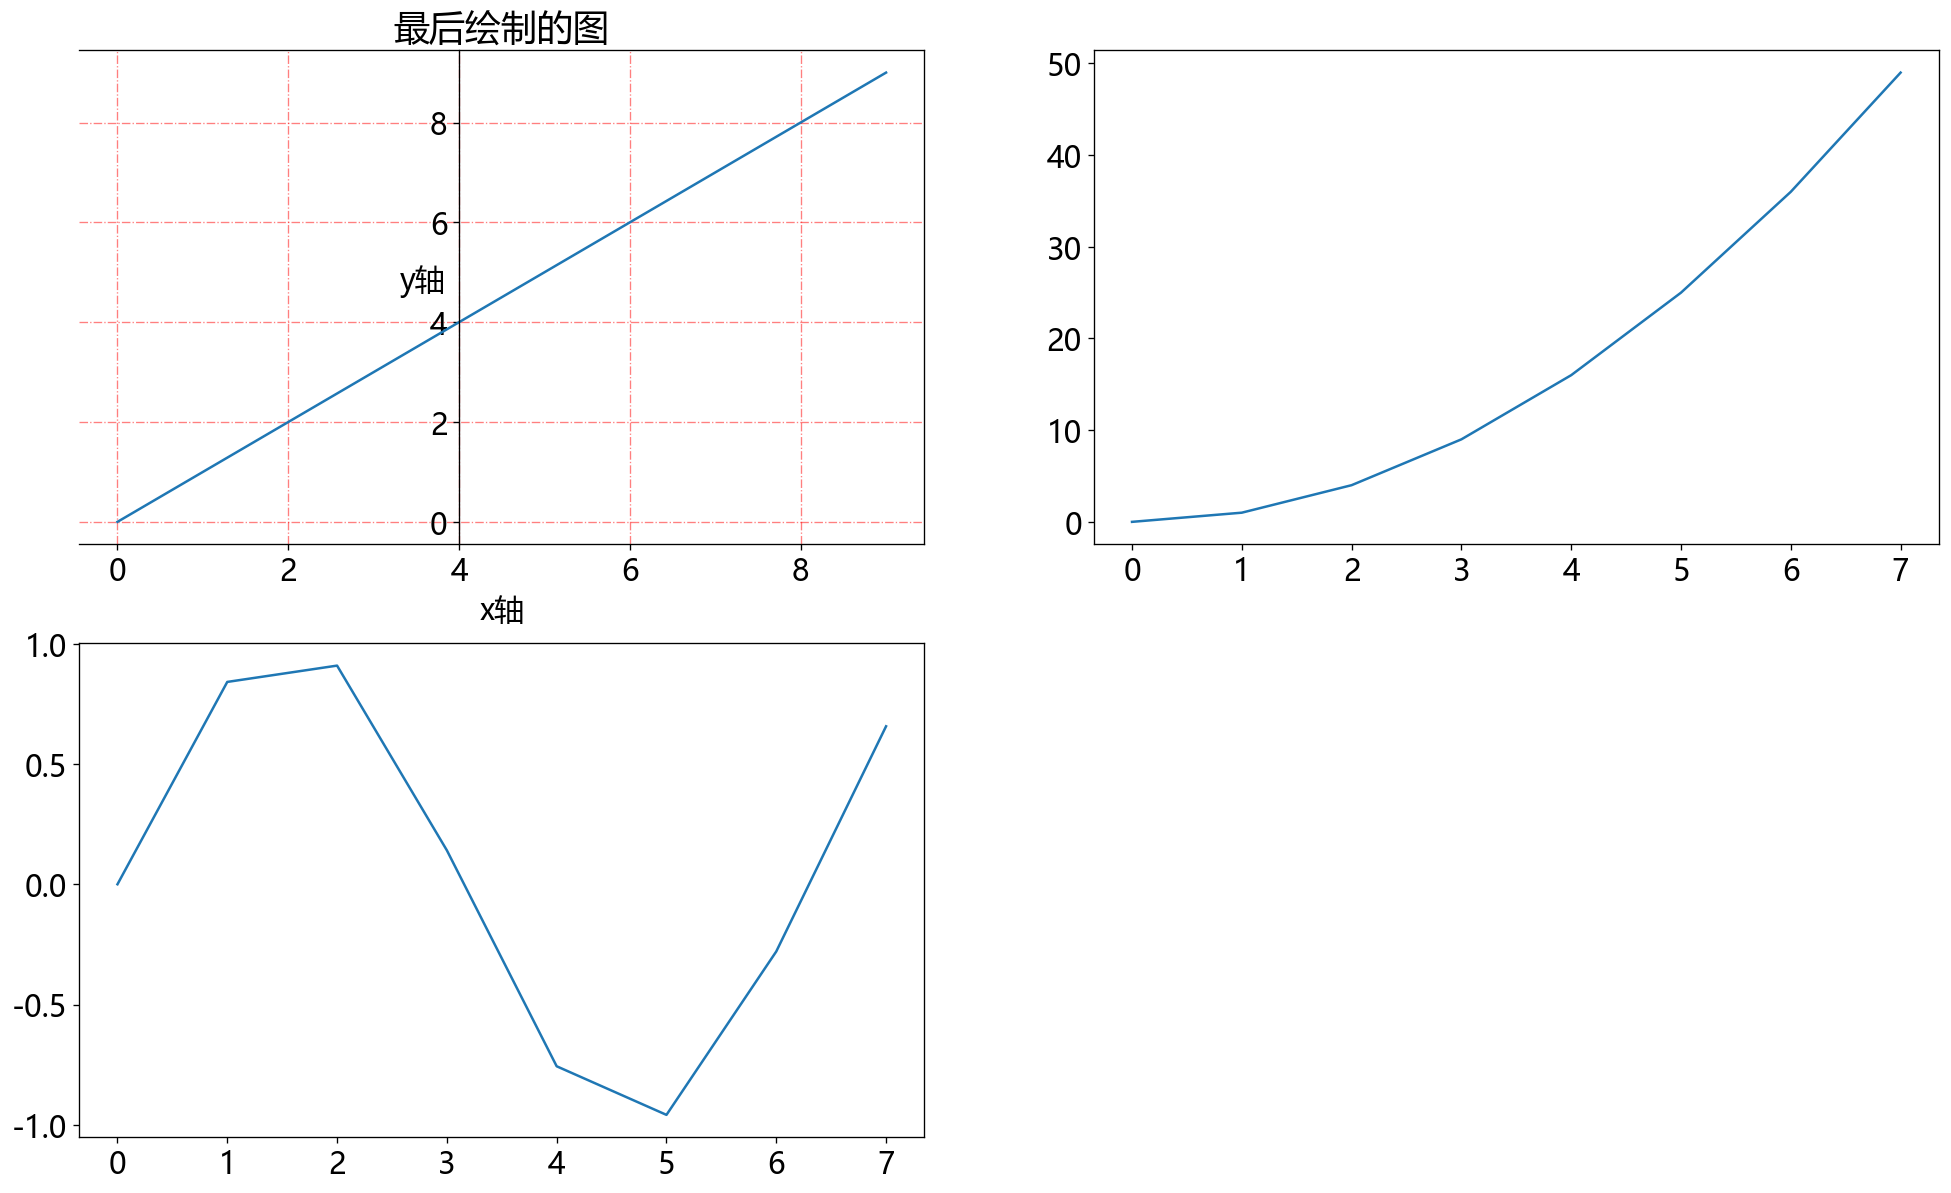

In [3]:
import math  

fig = plt.figure(figsize=(20, 12), dpi=120)  

# '222'表示第 2 行, 第 2 列的第 2 个位置  
ax1 = fig.add_subplot(222)  
ax1.plot(range(8), [x**2 for x in range(8)])  

# 可以逗号隔开  
ax2 = fig.add_subplot(2,2,3)  
ax2.plot(range(8), [math.sin(x) for x in range(8)])  

ax3 = fig.add_subplot(221)  

# gca() 获取当前绘图对象, 最后绘制的那个  
# 如果没有, 将创建一个新的  
pg = plt.gca()  

# 设置属性  
pg.set(title='最后绘制的图', xlabel='x轴')  
pg.set_ylabel('y轴', rotation=0) # 设置 y 轴标签水平显示  

pg.plot(range(10), range(10))  

# 将 y 轴移动到 x=4 处  
pg.spines['left'].set_position(('data', 4))  

# 添加网格线, 设置颜色, 透明度  
pg.grid(color='r', linestyle='-.', alpha=0.5)  

plt.show()  

有了层次结构的了解, 就可以更潇洒地直接使用 `plt` 绘图了, 用 `plt` 直接绘图, 如果不创建画布, 画布 和 绘图对象 自动生成

下面用常用的图形风格举例(参数非常多, 不做详细介绍):

## 3, 折线图

折线图一般用来反映数据的变化情况和趋势

上面例子中绘制的都是折线图, 下面 **将折线图映射成一排排点, 比较数据的分散程度:**

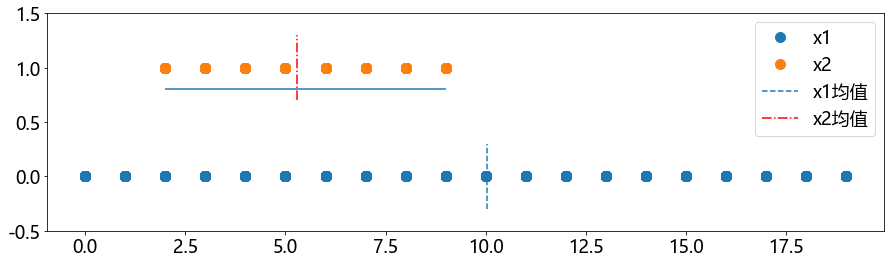

In [5]:
import numpy as np  

# 创建两组数据  
x1 = np.random.randint(0, 20, size=500)  
x2 = np.random.randint(2, 10, size=500)  

# 映射成两排点  
plt.figure(figsize=(15, 4))  
plt.ylim(-0.5, 1.5)  
plt.plot(x1, np.zeros(len(x1)),  
         ls='', # 线条设为空  
         marker='o', # 数据点的样式  
         ms=10, # 点的大小  
         label='x1')  
plt.plot(x2, np.ones(len(x2)), ls='', marker='o', ms=10, label='x2')  

# 绘出两组数据均值所在位置  
plt.axvline(x1.mean(),  
            0.1, 0.4, # 竖线的范围, 取值为 0~1 之间  
            ls='--', # 线条样式  
            label='x1均值')  
plt.axvline(x2.mean(), 0.6, 0.9, ls='-.', color='r', label='x2均值')  

# 划出 x2 的范围线  
plt.hlines(0.8, x2.min(), x2.max())  

plt.legend(fontsize=18)  
plt.show()  

## 4, 散点图

散点图一般用来反映数据之间关联性(类别和分布规律)

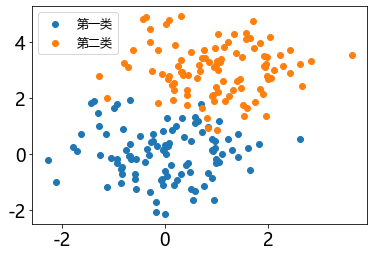

In [6]:
# 创建数据  
y = np.random.randn(2, 100)  

# 第一个类别  
plt.scatter(y[0], y[1], label='第一类')  

# 第二个类别  
plt.scatter(y[0] + 1, y[1] + 3, label='第二类')  

plt.legend()  
plt.show()  

## 5, 柱状图

柱状图一般用来比较数据的统计量, 对数据进行直观的比较

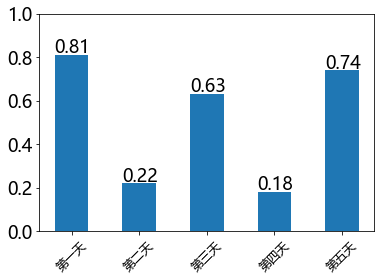

In [7]:
# 接下来 5 天下雨的概率  
prob = [0.81, 0.22, 0.63, 0.18, 0.74]  

# x 轴标签  
x = ['第一天', '第二天', '第三天', '第四天', '第五天']  

# 绘图并将图赋值给 rects  
rects = plt.bar(x, prob, width=0.5)  

# 设置 x 轴标签字体和倾斜度; y 轴范围  
plt.xticks(fontsize=12, rotation=45)  
plt.ylim(0, 1)  

# 在柱状图上添加概率标注  
for rect in rects:  
    height = rect.get_height()  
    plt.text(rect.get_x(), height + 0.01, str(height))  

plt.show()  

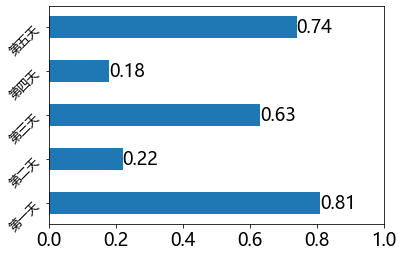

In [8]:
# 还可以横向绘制  
rects = plt.barh(x, prob, height=0.5)  

plt.yticks(fontsize=12, rotation=45)  
plt.xlim(0, 1)  

# 在柱状图上添加概率标注  
for rect in rects:  
    width = rect.get_width()  
    plt.text(width,  
             rect.get_y() + 0.5/2,  
             str(width),  
             va='center')  

plt.show() 

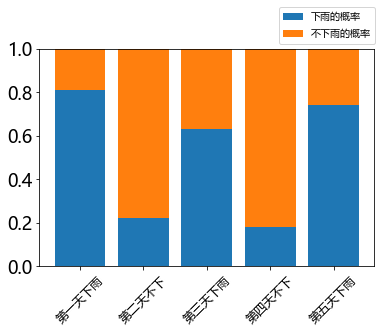

In [9]:
# 假设概率大于 0.5 就是下雨, 展示下雨和不下雨, 同时展示概率  
# 接下来 5 天下雨的概率  
prob1 = [0.81, 0.22, 0.63, 0.18, 0.74]  

# 不下雨的概率  
prob2 = 1 - np.array(prob)  

# 设置 x 轴标签  
x = ['第一天', '第二天', '第三天', '第四天', '第五天']  
m = ['下雨' if i > 0.5 else '不下' for i in prob1]  
n = [x[i] + m[i] for i in range(len(x))]  

# 绘图  
plt.bar(n, prob1, label='下雨的概率')  
plt.bar(n, prob2, label='不下雨的概率', bottom=prob1)  

plt.ylim(0, 1)  
plt.xticks(fontsize=12, rotation=45)  

plt.legend(fontsize=10, loc='best', bbox_to_anchor=(0.7, 1))  
plt.show()  

## 6, 直方图

直方图用来直观地反映数据的总体分布情况

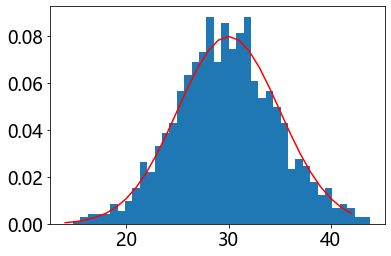

In [10]:
# 创建数据  
np.random.seed(0)  
data = np.random.normal(30, 5, size=1000)  
# 30 是数据的均值, 5 是标准差  

# 绘制直方图  
plt.hist(data,  
         40, # 组数  
         density=True # 每组以占比显示  
        )  

# 绘制概率密度曲线  
x = np.arange(int(data.min()), int(data.max()))  
f = lambda x, mu, sigma: np.exp(-((x - mu)**2) / (2 * sigma**2)  
                               ) / (sigma * np.sqrt(2 * np.pi))  
y = f(x, 30, 5)  
plt.plot(x, y, ls='-', color='r')  

plt.show()  

上图可以利用基于 matpoltlib 的库 seaborn 绘制更方便:

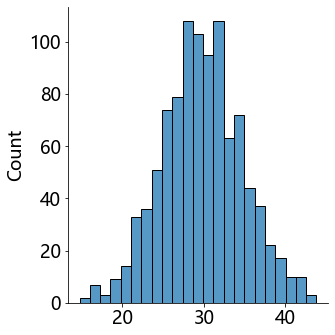

In [12]:
import seaborn as sns  
sns.displot(data)  
plt.show() 

## 7, 饼图

饼图用来直观地反映各个类别占比

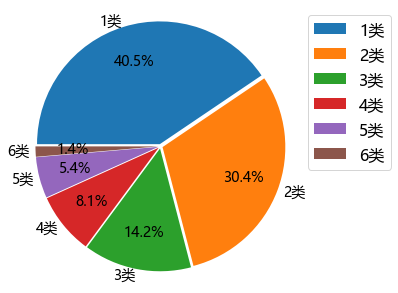

In [13]:
plt.rcParams['font.size'] = 14  
fig = plt.figure(figsize=(5, 6))  

# 准备数据  
x = [60, 45, 21, 12, 8, 2] # 每个类别数量  
labels = [f'{i}类' for i in range(1, len(x) + 1)] # 类别名  
explode = [0.02] * len(x) # 每一块离中心的距离  

plt.pie(x,  
        explode=explode,  
        labels=labels,  
        colors=None, # 颜色不配置, 使用默认  
        autopct='%.1f%%', # 设置百分比标签  
        pctdistance=0.7, # 设置百分比标签离中心的距离  
        shadow=False, # 设置阴影  
        labeldistance=1.05, # 设置类别标签离中心的距离  
        startangle=180, # 设置绘制起始位置  
        radius=1.1, # 设置饼图大小  
        counterclock=False, # 设置顺逆时针  
       )  

plt.legend(fontsize=16, loc='best', bbox_to_anchor=(1, 1))  
plt.show()  

**拓展:** 绘制三维立体图

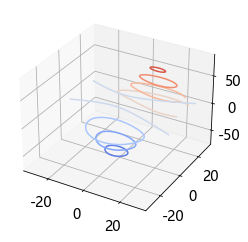

In [15]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

ax = plt.figure().add_subplot(projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)

ax.contour(X, Y, Z, cmap=cm.coolwarm)  # Plot contour curves

plt.show()